In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn import metrics as ms
import numpy as np

In [3]:
# Read in the files
df=pd.read_csv('..//ML_Table.csv')
df.head()

,country_code,area,year_pc,CO2_emissions_tonnes,Population,category_code_1,food_product_categories_1,production_tonnes_1,total_kgs_CO2_1,category_code_2,...,production_tonnes_41,total_kgs_CO2_41,category_code_42,food_product_categories_42,production_tonnes_42,total_kgs_CO2_42,category_code_43,food_product_categories_43,production_tonnes_43,total_kgs_CO2_43
0,0,Afghanistan,2000,71679740.0,19542982.0,1,Apples,40540.06,58783.0870,2,...,0.0,0.0,42,Wheat & Rye (Bread),1470000.0,10518040.0,43,Wine,0.0,0.0
1,0,Afghanistan,2001,72477702.0,19688632.0,1,Apples,39541.74,57335.5230,2,...,0.0,0.0,42,Wheat & Rye (Bread),1600000.0,11434520.0,43,Wine,0.0,0.0
2,0,Afghanistan,2002,73529311.0,21000256.0,1,Apples,35630.08,51663.6160,2,...,0.0,0.0,42,Wheat & Rye (Bread),2690000.0,19231760.0,43,Wine,0.0,0.0
3,0,Afghanistan,2003,74715262.0,22645130.0,1,Apples,28042.99,40662.3355,2,...,0.0,0.0,42,Wheat & Rye (Bread),3480000.0,24916800.0,43,Wine,0.0,0.0
4,0,Afghanistan,2004,75604429.0,23553551.0,1,Apples,16691.83,24203.1535,2,...,0.0,0.0,42,Wheat & Rye (Bread),2390000.0,17112400.0,43,Wine,0.0,0.0


In [4]:
# Set variables
y = df ['CO2_emissions_tonnes']
X = df [['total_kgs_CO2_1','total_kgs_CO2_2','total_kgs_CO2_3','total_kgs_CO2_4','total_kgs_CO2_6','total_kgs_CO2_','total_kgs_CO2_8','total_kgs_CO2_9','total_kgs_CO2_10','total_kgs_CO2_11','total_kgs_CO2_12','total_kgs_CO2_13','total_kgs_CO2_14','total_kgs_CO2_15','total_kgs_CO2_18','total_kgs_CO2_19','total_kgs_CO2_20','total_kgs_CO2_21','total_kgs_CO2_22','total_kgs_CO2_23','total_kgs_CO2_24','total_kgs_CO2_25','total_kgs_CO2_26','total_kgs_CO2_27','total_kgs_CO2_28','total_kgs_CO2_29','total_kgs_CO2_30','total_kgs_CO2_31','total_kgs_CO2_32','total_kgs_CO_33','total_kgs_CO2_34','total_kgs_CO2_35','total_kgs_CO2_37','total_kgs_CO2_39','total_kgs_CO2_40','total_kgs_CO2_41','total_kgs_CO2_42','total_kgs_CO2_43']]
X.shape

(4201, 38)

In [5]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

(3150, 38)

In [6]:
txt = "Random Forest Regressor"

x = txt.title()

print(x)

Random Forest Regressor


In [7]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [8]:
y_pred = regressor.predict(X_test)
y_pred

array([4.52797702e+07, 3.78274272e+07, 4.98235618e+07, ...,
       8.63382350e+10, 4.04652160e+06, 2.01340464e+07])

In [9]:
pred_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
pred_df

,Real Values,Predicted Values
3604,4.245974e+07,4.527977e+07
781,3.788563e+07,3.782743e+07
2165,4.881502e+07,4.982356e+07
1217,4.942875e+07,4.399466e+07
1006,7.199476e+08,1.518572e+09
...,...,...
2907,2.624575e+10,4.270512e+10
3630,3.550416e+06,3.275250e+06
3000,8.785206e+10,8.633823e+10
982,4.187952e+06,4.046522e+06


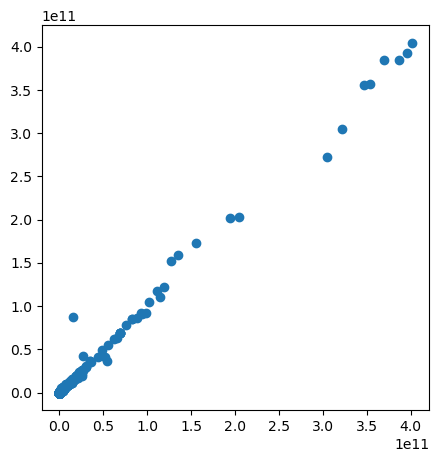

In [10]:
# Plot real values vs predicted
plt.figure(figsize=(5,5))
plt.scatter(pred_df['Real Values'], pred_df['Predicted Values'])
plt.show()                                            

In [11]:
# List the features sorted in descending order by feature importance
importance_sorted_idx = regressor.feature_importances_.argsort()[::-1]
for i in importance_sorted_idx:
    print(f"{X.columns[i]}: ({regressor.feature_importances_[i]})")

total_kgs_CO2_32: (0.3829163226248903)
total_kgs_CO2_19: (0.3713238332773105)
total_kgs_CO2_3: (0.11906291247969591)
total_kgs_CO_33: (0.05257237969863006)
total_kgs_CO2_39: (0.028644740527340312)
total_kgs_CO2_4: (0.0065279124317180245)
total_kgs_CO2_8: (0.0044324793176801405)
total_kgs_CO2_6: (0.00409624006195224)
total_kgs_CO2_29: (0.003799460280543747)
total_kgs_CO2_31: (0.003615561979289842)
total_kgs_CO2_23: (0.002994254325689148)
total_kgs_CO2_25: (0.0022541039019453816)
total_kgs_CO2_18: (0.0020499997991848397)
total_kgs_CO2_30: (0.001871503911575716)
total_kgs_CO2_1: (0.001708065116176341)
total_kgs_CO2_15: (0.0016285217820676688)
total_kgs_CO2_20: (0.0013019797640675388)
total_kgs_CO2_22: (0.001270691914832161)
total_kgs_CO2_21: (0.0010855079645691018)
total_kgs_CO2_24: (0.0010541451740806093)
total_kgs_CO2_35: (0.0008016539017839587)
total_kgs_CO2_: (0.0006339659285094808)
total_kgs_CO2_9: (0.0005825881688420241)
total_kgs_CO2_11: (0.0005103970466823654)
total_kgs_CO2_27: (0

In [12]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [13]:
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 481368602.38
Mean Squared Error: 8.93989705992044e+18
R-squared scores: 0.99


In [14]:
# Fitting Extra Trees Regressor to the dataset
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators = 10, random_state = 0)
etr.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=10, random_state=0)

In [15]:
y_pred = etr.predict(X_test)
y_pred

array([2.26449501e+08, 3.90939604e+07, 4.81097071e+07, ...,
       8.86245140e+10, 3.96682120e+06, 2.10024144e+07])

In [16]:
pred_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
pred_df

,Real Values,Predicted Values
3604,4.245974e+07,2.264495e+08
781,3.788563e+07,3.909396e+07
2165,4.881502e+07,4.810971e+07
1217,4.942875e+07,2.259480e+08
1006,7.199476e+08,6.803526e+08
...,...,...
2907,2.624575e+10,2.686362e+10
3630,3.550416e+06,3.751776e+06
3000,8.785206e+10,8.862451e+10
982,4.187952e+06,3.966821e+06


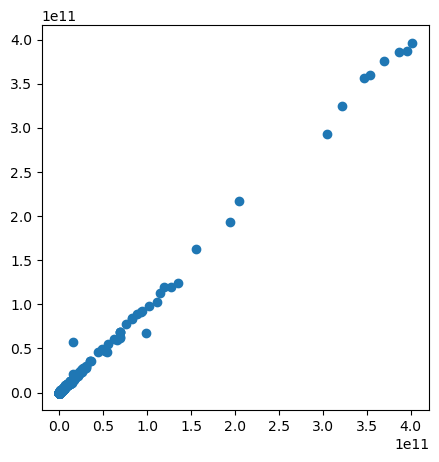

In [17]:
# Plot real values vs predicted
plt.figure(figsize=(5,5))
plt.scatter(pred_df['Real Values'], pred_df['Predicted Values'])
plt.show() 

In [19]:
# List the features of Extra Trees Regressor sorted in descending order by feature importance
importance_sorted_idx = etr.feature_importances_.argsort()[::-1]
for i in importance_sorted_idx:
    print(f"{X.columns[i]}: ({etr.feature_importances_[i]})")

total_kgs_CO2_19: (0.4207381956512852)
total_kgs_CO2_32: (0.1356238947451423)
total_kgs_CO2_3: (0.11210502925121384)
total_kgs_CO2_11: (0.09877727956845431)
total_kgs_CO2_4: (0.0687684793460572)
total_kgs_CO_33: (0.02937452752956473)
total_kgs_CO2_23: (0.018779484765349626)
total_kgs_CO2_18: (0.012174755475440344)
total_kgs_CO2_15: (0.011327117050498652)
total_kgs_CO2_6: (0.009292426645725542)
total_kgs_CO2_8: (0.007852060899869263)
total_kgs_CO2_30: (0.006789026345250688)
total_kgs_CO2_29: (0.006716343243549366)
total_kgs_CO2_27: (0.006545925289845465)
total_kgs_CO2_40: (0.006222185595158248)
total_kgs_CO2_21: (0.005845869356753944)
total_kgs_CO2_10: (0.005542144989503107)
total_kgs_CO2_: (0.004348259394504023)
total_kgs_CO2_20: (0.003995871119545557)
total_kgs_CO2_2: (0.003934148619672602)
total_kgs_CO2_22: (0.0037351694750661557)
total_kgs_CO2_25: (0.0030419550106730343)
total_kgs_CO2_12: (0.0029266974276105392)
total_kgs_CO2_35: (0.0022780146541760715)
total_kgs_CO2_39: (0.00204558

In [20]:
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 354679247.23
Mean Squared Error: 3.7943319568033756e+18
R-squared scores: 1.0


In [21]:
# Fitting XG Boost Regressor to the dataset
import xgboost as xg
xgbr = xg.XGBRegressor(n_estimators = 10, random_state = 0)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [22]:
y_pred = xgbr.predict(X_test)
y_pred

array([4.2407946e+08, 1.6831638e+08, 1.6831638e+08, ..., 8.4865884e+10,
       8.2262960e+07, 1.8913299e+08], dtype=float32)

In [23]:
pred_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
pred_df

,Real Values,Predicted Values
3604,4.245974e+07,4.240795e+08
781,3.788563e+07,1.683164e+08
2165,4.881502e+07,1.683164e+08
1217,4.942875e+07,1.683164e+08
1006,7.199476e+08,2.068750e+09
...,...,...
2907,2.624575e+10,3.570316e+10
3630,3.550416e+06,9.183214e+07
3000,8.785206e+10,8.486588e+10
982,4.187952e+06,8.226296e+07


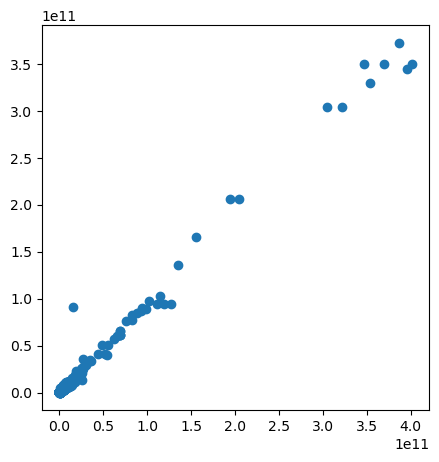

In [24]:
# Plot real values vs predicted
plt.figure(figsize=(5,5))
plt.scatter(pred_df['Real Values'], pred_df['Predicted Values'])
plt.show() 

In [26]:
# List the features of XG Boost Regressor sorted in descending order by feature importance
importance_sorted_idx = xgbr.feature_importances_.argsort()[::-1]
for i in importance_sorted_idx:
    print(f"{X.columns[i]}: ({xgbr.feature_importances_[i]})")

total_kgs_CO2_19: (0.7769873142242432)
total_kgs_CO2_3: (0.07589844614267349)
total_kgs_CO_33: (0.05980156362056732)
total_kgs_CO2_39: (0.023133641108870506)
total_kgs_CO2_1: (0.01229135598987341)
total_kgs_CO2_26: (0.012278268113732338)
total_kgs_CO2_31: (0.009784840047359467)
total_kgs_CO2_40: (0.004197007976472378)
total_kgs_CO2_25: (0.0030843843705952168)
total_kgs_CO2_8: (0.0029300733003765345)
total_kgs_CO2_: (0.0020167494658380747)
total_kgs_CO2_15: (0.0018721258966252208)
total_kgs_CO2_32: (0.001755588105879724)
total_kgs_CO2_41: (0.0016538266791030765)
total_kgs_CO2_11: (0.0016121836379170418)
total_kgs_CO2_37: (0.001365048810839653)
total_kgs_CO2_42: (0.0013355916598811746)
total_kgs_CO2_30: (0.00120867311488837)
total_kgs_CO2_23: (0.0010575371561571956)
total_kgs_CO2_4: (0.001030527986586094)
total_kgs_CO2_34: (0.0009208206320181489)
total_kgs_CO2_29: (0.0008374936296604574)
total_kgs_CO2_20: (0.0007784460322000086)
total_kgs_CO2_2: (0.0004463207733351737)
total_kgs_CO2_9: (

In [27]:
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared scores
r2 = r2_score(y_test, y_pred)

RMSE = np.sqrt(ms.mean_squared_error(y_test,y_pred))

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))
print('RMSE:', round(RMSE,2))

Mean Absolute Error: 1041042237.78
Mean Squared Error: 1.6076770609070854e+19
R-squared scores: 0.99
RMSE: 4009584842.48
